In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
dataset

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
...                                          ...       ...        ...  
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
264832             Tostitos Splash Of  Lime 175g         1        4.4  
264833                  Doritos Mexicana    170g         2        8.8  
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8  
264835             Tostitos Splash Of  Lime 175g         2        8.8  

[264836 rows x 8 columns]

In [4]:
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')

In [5]:
dataset.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
dataset.describe()

DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.000000       2.000000       9.200000  
max       114.000000     200.000000     650.000000

In [7]:
#number of unique values
no_of_un_vals = dataset['PROD_NAME'].nunique()
# all the uniques values
unq_vals = dataset['PROD_NAME'].unique()

print(no_of_un_vals)
print(unq_vals)

114
['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red R

In [8]:
# Splitting and extracting individual words from unique product names
unique_product_names = dataset['PROD_NAME'].unique()
product_words = []

for name in unique_product_names:
    words = name.split()  # Split product name into words
    product_words.extend(words)  # Extend the list with words

# Create a DataFrame with the words
product_words_df = pd.DataFrame({'words': product_words})

# Display the first few rows of the resulting DataFrame
print(product_words_df.head(50))


            words
0         Natural
1            Chip
2          Compny
3     SeaSalt175g
4             CCs
5           Nacho
6          Cheese
7            175g
8          Smiths
9         Crinkle
10            Cut
11          Chips
12        Chicken
13           170g
14         Smiths
15           Chip
16         Thinly
17  S/Cream&Onion
18           175g
19         Kettle
20       Tortilla
21  ChpsHny&Jlpno
22          Chili
23           150g
24            Old
25             El
26           Paso
27          Salsa
28            Dip
29         Tomato
30           Mild
31           300g
32         Smiths
33        Crinkle
34          Chips
35           Salt
36              &
37        Vinegar
38           330g
39          Grain
40          Waves
41          Sweet
42         Chilli
43           210g
44        Doritos
45           Corn
46           Chip
47        Mexican
48       Jalapeno
49           150g


In [9]:

import re
# Splitting and extracting individual words from unique product names

product_words = []

for name in unique_product_names:
    words = name.split()  # Split product name into words
    product_words.extend(words)  # Extend the list with words

# Create a DataFrame with the words
product_words_df = pd.DataFrame({'words': product_words})

# Remove words with digits and special characters
product_words_df['words'] = product_words_df['words'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))

# Count the frequency of each word
word_counts = product_words_df['words'].value_counts()

# Sort the words by frequency in descending order
sorted_words = word_counts.sort_values(ascending=False)

# Display the sorted words by frequency
print(sorted_words.head(50))


words
g             105
Chips          21
               17
Smiths         16
Crinkle        14
Cut            14
Kettle         13
Salt           12
Cheese         12
Original       10
Salsa           9
Doritos         9
Chip            9
RRD             8
Pringles        8
Corn            8
Chicken         7
WW              7
Sour            6
Chilli          6
Sea             6
Vinegar         5
Crisps          5
Thinly          5
Thins           5
Rock            4
Deli            4
Supreme         4
Natural         4
Red             4
Cream           4
Infuzions       4
Dip             3
Sensations      3
Mild            3
Woolworths      3
CCs             3
Lime            3
Paso            3
Tomato          3
Soy             3
Popd            3
El              3
Chives          3
Tostitos        3
Tortilla        3
Old             3
Twisties        3
Sweet           3
Cobs            3
Name: count, dtype: int64


In [10]:
dataset[dataset['PROD_NAME'].str.contains('Salsa', case=False, na=False)]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
5       43604          4            4074    2982        57   
25      43600         39           39144   35506        57   
32      43605         45           45127   41122        64   
44      43330         56           56013   50090        39   
63      43600         82           82480   82047       101   
...       ...        ...             ...     ...       ...   
264675  43575        265          265103  263419        59   
264678  43554        265          265111  263428        35   
264719  43401        266          266278  264104        39   
264734  43476        267          267324  264374        41   
264780  43475        269          269222  266382        64   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
5       Old El Paso Salsa   Dip Tomato Mild 300g         1        5.1  
25      Old El Paso Salsa   Dip Tomato Mild 300g         1        5.1  
32      Red Rock Deli SR    Salsa & Mzzrlla 150g         2        5.4  
44         Smiths Crinkle Cut  Tomato Salsa 150g         1        2.6  
63               Doritos Salsa       Medium 300g         1        2.6  
...                                          ...       ...        ...  
264675   Old El Paso Salsa   Dip Tomato Med 300g         1        5.1  
264678            Woolworths Mild     Salsa 300g         1        1.5  
264719     Smiths Crinkle Cut  Tomato Salsa 150g         1        2.6  
264734                  Doritos Salsa Mild  300g         1        2.6  
264780  Red Rock Deli SR    Salsa & Mzzrlla 150g         2        5.4  

[18094 rows x 8 columns]

In [11]:
# Mark products containing "salsa" (case-insensitive) as True in a new column 'SALSA'
dataset['SALSA'] = dataset['PROD_NAME'].str.lower().str.contains('salsa')

# Filter out the products that have 'SALSA' as True, and remove the 'SALSA' column
dataset = dataset[dataset['SALSA'] == False].drop(columns=['SALSA'])

In [12]:
dataset

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
...                                          ...       ...        ...  
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
264832             Tostitos Splash Of  Lime 175g         1        4.4  
264833                  Doritos Mexicana    170g         2        8.8  
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8  
264835             Tostitos Splash Of  Lime 175g         2        8.8  

[246742 rows x 8 columns]

In [13]:
import pandas as pd

# Assuming your data is in a DataFrame called 'transactionData'
productWords = dataset['PROD_NAME'].str.split(' ').explode().unique()

# Create a DataFrame to hold the unique words
productWords_df = pd.DataFrame(productWords, columns=['words'])

# Display the unique words
print(productWords_df)


           words
0        Natural
1           Chip
2               
3         Compny
4    SeaSalt175g
..           ...
202          Rst
203         Pork
204        Belly
205           Pc
206    Bolognese

[207 rows x 1 columns]


In [14]:
import pandas as pd

# Assuming 'productWords_df' is the DataFrame containing unique product words
# Remove words with digits and special characters
filtered_words = productWords_df[~productWords_df['words'].str.contains(r'[^a-zA-Z\s]')]

# Count the frequency of each word
word_counts = filtered_words['words'].value_counts().reset_index()
word_counts.columns = ['words', 'frequency']

# Sort the words by frequency in descending order
sorted_words = word_counts.sort_values(by='frequency', ascending=False)

# Display the most common words
print(sorted_words)


         words  frequency
0      Natural          1
108      Chips          1
101                     1
102     Compny          1
103        CCs          1
..         ...        ...
53        Slow          1
54         Rst          1
55        Pork          1
56       Belly          1
156  Bolognese          1

[157 rows x 2 columns]


In [15]:
sorted_words.isnull().sum()

words        0
frequency    0
dtype: int64

In [16]:
summary = dataset.describe(include='all')

# Check for the presence of null values
null_counts = dataset.isnull().sum()

# Add a row in the summary to show the count of null values
summary.loc['NA count'] = null_counts

# Print the summary
print(summary)

                   DATE      STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count     246742.000000  246742.000000    2.467420e+05  2.467420e+05   
unique              NaN            NaN             NaN           NaN   
top                 NaN            NaN             NaN           NaN   
freq                NaN            NaN             NaN           NaN   
mean       43464.054875     135.051098    1.355310e+05  1.351311e+05   
std          105.396691      76.787096    8.071528e+04  7.814772e+04   
min        43282.000000       1.000000    1.000000e+03  1.000000e+00   
25%        43373.000000      70.000000    7.001500e+04  6.756925e+04   
50%        43464.000000     130.000000    1.303670e+05  1.351830e+05   
75%        43555.000000     203.000000    2.030840e+05  2.026538e+05   
max        43646.000000     272.000000    2.373711e+06  2.415841e+06   
NA count       0.000000       0.000000    0.000000e+00  0.000000e+00   

               PROD_NBR                               PROD_NAME

In [17]:
#Filter the dataset to find transactions with 200 packets of chips
outlier_transactions = dataset[dataset['PROD_QTY'] == 200]

# Print the transactions with 200 packets of chips
print(outlier_transactions)

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [18]:
import pandas as pd

# Assuming you have a DataFrame named 'transactionData' and you want to investigate a specific customer with a known loyalty card number
customer_id = 226000  # Replace with the actual customer's loyalty card number

# Filter the dataset to find other transactions by the same customer
other_transactions_by_customer = dataset[dataset['LYLTY_CARD_NBR'] == customer_id]

# Print the other transactions by the customer
print(other_transactions_by_customer)


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [19]:
customer_id = 226000  

# Filter the dataset to exclude transactions by the specific customer
dataset = dataset[dataset['LYLTY_CARD_NBR'] != customer_id]

# Now, 'dataset' contains all transactions except those associated with the specific customer


In [20]:
dataset

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
...                                          ...       ...        ...  
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
264832             Tostitos Splash Of  Lime 175g         1        4.4  
264833                  Doritos Mexicana    170g         2        8.8  
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8  
264835             Tostitos Splash Of  Lime 175g         2        8.8  

[246740 rows x 8 columns]

In [21]:
dataset.describe(include='all')

DATE      STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count   246740.000000  246740.000000    2.467400e+05  2.467400e+05   
unique            NaN            NaN             NaN           NaN   
top               NaN            NaN             NaN           NaN   
freq              NaN            NaN             NaN           NaN   
mean     43464.054843     135.050361    1.355303e+05  1.351304e+05   
std        105.396396      76.786971    8.071520e+04  7.814760e+04   
min      43282.000000       1.000000    1.000000e+03  1.000000e+00   
25%      43373.000000      70.000000    7.001500e+04  6.756875e+04   
50%      43464.000000     130.000000    1.303670e+05  1.351815e+05   
75%      43555.000000     203.000000    2.030832e+05  2.026522e+05   
max      43646.000000     272.000000    2.373711e+06  2.415841e+06   

             PROD_NBR                               PROD_NAME       PROD_QTY  \
count   246740.000000                                  246740  246740.000000   
unique            NaN                                     105            NaN   
top               NaN  Kettle Mozzarella   Basil & Pesto 175g            NaN   
freq              NaN                                    3304            NaN   
mean        56.352213                                     NaN       1.906456   
std         33.695235                                     NaN       0.342499   
min          1.000000                                     NaN       1.000000   
25%         26.000000                                     NaN       2.000000   
50%         53.000000                                     NaN       2.000000   
75%         87.000000                                     NaN       2.000000   
max        114.000000                                     NaN       5.000000   

            TOT_SALES  
count   246740.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         7.316113  
std          2.474897  
min          1.700000  
25%          5.800000  
50%          7.400000  
75%          8.800000  
max         29.500000

In [22]:
dataset['PROD_NAME'].isnull().sum()

0

In [31]:
transaction_counts_by_date = dataset.groupby('DATE').size().reset_index(name='Transaction_Count')

# Print the summary of transaction counts by date
print(transaction_counts_by_date)

          DATE  Transaction_Count
0   2018-07-01                663
1   2018-07-02                650
2   2018-07-03                674
3   2018-07-04                669
4   2018-07-05                660
..         ...                ...
359 2019-06-26                657
360 2019-06-27                669
361 2019-06-28                673
362 2019-06-29                703
363 2019-06-30                704

[364 rows x 2 columns]


In [23]:
dataset

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
...                                          ...       ...        ...  
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
264832             Tostitos Splash Of  Lime 175g         1        4.4  
264833                  Doritos Mexicana    170g         2        8.8  
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8  
264835             Tostitos Splash Of  Lime 175g         2        8.8  

[246740 rows x 8 columns]

In [24]:
date = dataset['DATE']

In [25]:
date

0         43390
1         43599
2         43605
3         43329
4         43330
          ...  
264831    43533
264832    43325
264833    43410
264834    43461
264835    43365
Name: DATE, Length: 246740, dtype: int64

In [26]:
from datetime import datetime, timedelta
origin_date = datetime(1899, 12, 30)
datetime_dates = [origin_date + timedelta(days=date) for date in date]

# Display the converted datetime dates
for dt in datetime_dates:
    print(dt)

2018-10-17 00:00:00
2019-05-14 00:00:00
2019-05-20 00:00:00
2018-08-17 00:00:00
2018-08-18 00:00:00
2019-05-16 00:00:00
2019-05-16 00:00:00
2018-08-20 00:00:00
2018-08-18 00:00:00
2019-05-17 00:00:00
2018-08-20 00:00:00
2019-05-18 00:00:00
2018-08-17 00:00:00
2019-05-15 00:00:00
2019-05-19 00:00:00
2018-08-18 00:00:00
2018-08-14 00:00:00
2018-08-17 00:00:00
2019-05-16 00:00:00
2019-05-19 00:00:00
2018-08-16 00:00:00
2018-08-16 00:00:00
2018-08-19 00:00:00
2018-08-15 00:00:00
2018-08-19 00:00:00
2019-05-15 00:00:00
2018-08-15 00:00:00
2019-05-20 00:00:00
2019-05-16 00:00:00
2019-05-15 00:00:00
2019-05-18 00:00:00
2018-08-16 00:00:00
2018-08-19 00:00:00
2018-08-18 00:00:00
2018-08-17 00:00:00
2018-08-18 00:00:00
2018-08-18 00:00:00
2019-05-14 00:00:00
2019-05-20 00:00:00
2019-05-20 00:00:00
2019-05-16 00:00:00
2019-05-16 00:00:00
2019-05-16 00:00:00
2018-08-16 00:00:00
2019-05-15 00:00:00
2019-05-14 00:00:00
2019-05-20 00:00:00
2018-08-20 00:00:00
2019-05-20 00:00:00
2019-05-19 00:00:00


2018-09-23 00:00:00
2019-05-11 00:00:00
2019-06-20 00:00:00
2018-08-29 00:00:00
2018-10-09 00:00:00
2018-08-06 00:00:00
2018-08-22 00:00:00
2018-09-24 00:00:00
2018-11-11 00:00:00
2019-05-04 00:00:00
2019-05-29 00:00:00
2018-09-05 00:00:00
2019-02-18 00:00:00
2019-06-20 00:00:00
2018-08-04 00:00:00
2018-08-05 00:00:00
2018-10-25 00:00:00
2019-04-12 00:00:00
2019-05-11 00:00:00
2019-06-10 00:00:00
2018-08-31 00:00:00
2018-10-03 00:00:00
2018-09-06 00:00:00
2018-11-03 00:00:00
2018-08-04 00:00:00
2018-08-24 00:00:00
2018-09-07 00:00:00
2019-01-19 00:00:00
2019-06-06 00:00:00
2018-07-24 00:00:00
2019-01-31 00:00:00
2018-12-30 00:00:00
2019-02-10 00:00:00
2018-07-30 00:00:00
2018-12-20 00:00:00
2018-08-07 00:00:00
2018-09-27 00:00:00
2019-02-12 00:00:00
2019-02-24 00:00:00
2018-11-06 00:00:00
2019-01-02 00:00:00
2019-04-18 00:00:00
2019-06-21 00:00:00
2018-12-08 00:00:00
2019-04-12 00:00:00
2018-08-04 00:00:00
2019-01-07 00:00:00
2018-07-13 00:00:00
2018-09-26 00:00:00
2018-11-11 00:00:00


2019-04-07 00:00:00
2019-04-16 00:00:00
2019-03-04 00:00:00
2019-06-29 00:00:00
2019-06-12 00:00:00
2019-01-24 00:00:00
2019-04-06 00:00:00
2018-08-22 00:00:00
2019-03-16 00:00:00
2018-08-08 00:00:00
2018-08-28 00:00:00
2018-09-28 00:00:00
2018-12-29 00:00:00
2019-01-15 00:00:00
2019-01-29 00:00:00
2019-03-06 00:00:00
2018-07-26 00:00:00
2018-10-21 00:00:00
2018-11-15 00:00:00
2018-12-04 00:00:00
2019-01-13 00:00:00
2019-06-27 00:00:00
2019-01-31 00:00:00
2019-03-08 00:00:00
2019-04-20 00:00:00
2018-09-03 00:00:00
2019-02-05 00:00:00
2019-05-24 00:00:00
2018-07-17 00:00:00
2018-08-31 00:00:00
2018-11-18 00:00:00
2018-12-15 00:00:00
2018-12-20 00:00:00
2019-03-15 00:00:00
2019-03-29 00:00:00
2019-05-11 00:00:00
2019-05-12 00:00:00
2018-07-11 00:00:00
2018-10-15 00:00:00
2018-11-03 00:00:00
2019-02-07 00:00:00
2019-03-06 00:00:00
2019-06-14 00:00:00
2018-07-10 00:00:00
2018-09-07 00:00:00
2018-10-14 00:00:00
2018-10-28 00:00:00
2018-12-18 00:00:00
2019-01-27 00:00:00
2019-02-05 00:00:00


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
dataset['DATE'] = datetime_dates

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\455190698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DATE'] = datetime_dates


In [28]:
dataset

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
...                                          ...       ...        ...  
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
264832             Tostitos Splash Of  Lime 175g         1        4.4  
264833                  Doritos Mexicana    170g         2        8.8  
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8  
264835             Tostitos Splash Of  Lime 175g         2        8.8  

[246740 rows x 8 columns]

In [29]:
dataset.describe()

DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467400e+05  246740.000000  246740.000000  246740.000000  
mean   1.351304e+05      56.352213       1.906456       7.316113  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756875e+04      26.000000       2.000000       5.800000  
50%    1.351815e+05      53.000000       2.000000       7.400000  
75%    2.026522e+05      87.000000       2.000000       8.800000  
max    2.415841e+06     114.000000       5.000000      29.500000  
std    7.814760e+04      33.695235       0.342499       2.474897

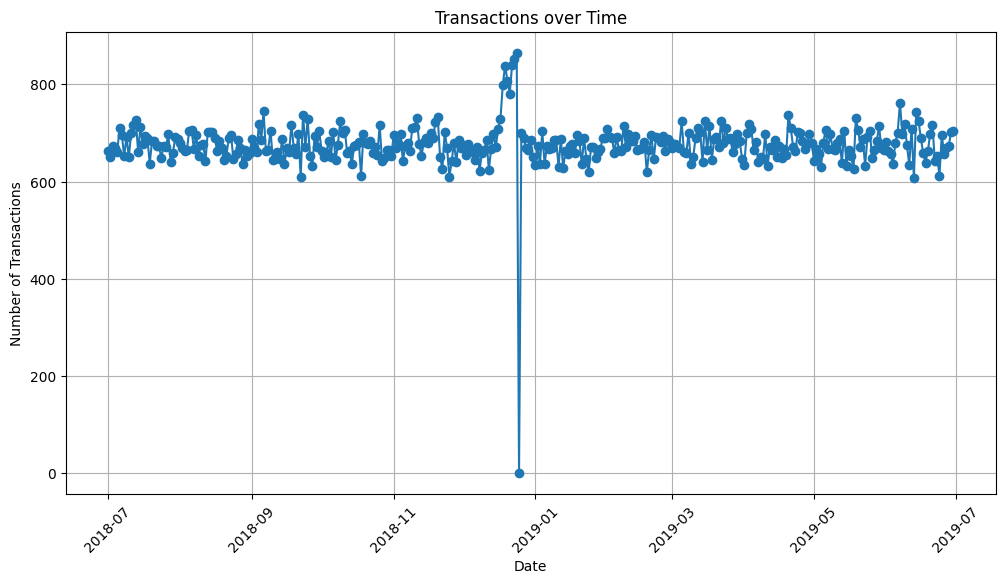

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'transactions_by_day' with 'DATE' and 'N' columns

# Create a date range from July 1, 2018, to June 30, 2019
date_range = pd.date_range(start= "2018-07-01", end= "2019-06-30" , freq='D')

# Create a DataFrame with the date range
date_df = pd.DataFrame({'DATE': date_range})

# Merge the date DataFrame with the transaction data to fill in missing dates
merged_data = date_df.merge(transaction_counts_by_date, on='DATE', how='left')

# Fill missing transaction counts with 0
merged_data['Transaction_Count'].fillna(0, inplace=True)

# Plot transactions over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE'], merged_data['Transaction_Count'], marker='o', linestyle='-')
plt.title('Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


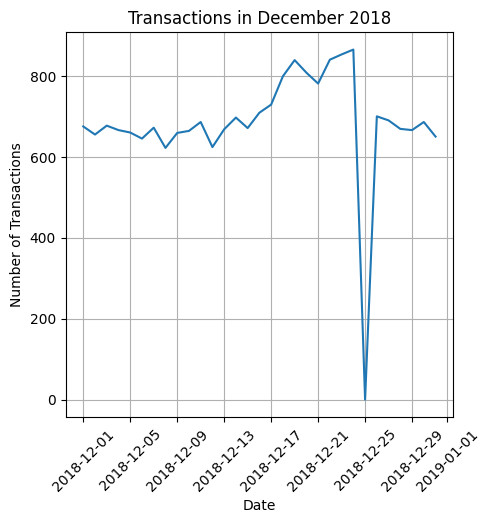

In [33]:
# Filter the data for the relevant dates in December
start_date_dec = pd.to_datetime('2018-12-01')
end_date_dec = pd.to_datetime('2018-12-31')
december_data = merged_data[(merged_data['DATE'] >= start_date_dec) & (merged_data['DATE'] <= end_date_dec)]

# Plot transactions in December
plt.figure(figsize=(5, 5))
plt.plot(december_data['DATE'], december_data['Transaction_Count'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions in December 2018')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [34]:
filtered_data = dataset['PROD_NAME'].str.extract(r'(\d+g)')
filtered_data.isnull().sum()

0    6064
dtype: int64

In [35]:
import re

# Extract the pack size using regular expressions
dataset.loc[:, 'PACK_SIZE'] = dataset['PROD_NAME'].str.extract(r'(\d+)g', expand=False)

# Convert the 'PACK_SIZE' column to numeric
dataset['PACK_SIZE'] = pd.to_numeric(dataset['PACK_SIZE'])


print(dataset.head())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\1820604476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'PACK_SIZE'] = dataset['PROD_NAME'].str.extract(r'(\d+)g', expand=False)


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0  
1                  CCs Nacho Cheese    175g         3        6.3      175.0  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\1820604476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['PACK_SIZE'] = pd.to_numeric(dataset['PACK_SIZE'])


In [36]:
dataset

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
...                                          ...       ...        ...   
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8   
264832             Tostitos Splash Of  Lime 175g         1        4.4   
264833                  Doritos Mexicana    170g         2        8.8   
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8   
264835             Tostitos Splash Of  Lime 175g         2        8.8   

        PACK_SIZE  
0           175.0  
1           175.0  
2           170.0  
3           175.0  
4           150.0  
...           ...  
264831      175.0  
264832      175.0  
264833      170.0  
264834      150.0  
264835      175.0  

[246740 rows x 9 columns]

In [37]:
dataset['PACK_SIZE'].isnull().sum()

6064

In [38]:
print(dataset['PACK_SIZE'].max())

print(dataset['PACK_SIZE'].min())

380.0
70.0


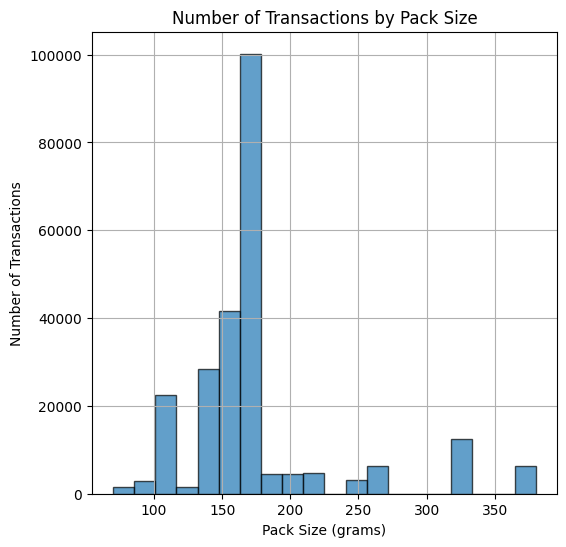

In [39]:
# Create a histogram of the number of transactions by pack size
plt.figure(figsize=(6, 6))
plt.hist(dataset['PACK_SIZE'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Pack Size (grams)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pack Size')
plt.grid(True)
plt.show()


In [40]:
# Extract the brand from the 'PROD_NAME' by taking the first word
dataset['BRAND'] = dataset['PROD_NAME'].str.split().str[0]

# Display the first few rows of the DataFrame to verify the 'BRAND' column
print(dataset.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

     BRAND  
0  Natural  
1      CCs  
2   Smiths  
3   Smiths  
4   Kettle  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\1381569778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['BRAND'] = dataset['PROD_NAME'].str.split().str[0]


In [41]:
# Combine brand names "RED" and "RRD" into "RRD" (case-insensitive)
dataset['BRAND'] = dataset['BRAND'].str.replace(r'(?i)^RED$', 'RRD', regex=True)

# Display the unique brand names to verify the update
unique_brands = dataset['BRAND'].unique()
print(unique_brands)


['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'RRD' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\1550563072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['BRAND'] = dataset['BRAND'].str.replace(r'(?i)^RED$', 'RRD', regex=True)


In [42]:
dataset['BRAND'].value_counts()

BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
RRD           16321
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [43]:
dataset.isnull().sum()

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
PACK_SIZE         6064
BRAND                0
dtype: int64

# CUSTOMER DATA ANALYSIS

In [44]:
customer_data

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]

In [45]:
customer_data.describe()

LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06

In [46]:
customer_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\3195916093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='PREMIUM_CUSTOMER', palette='Set2')


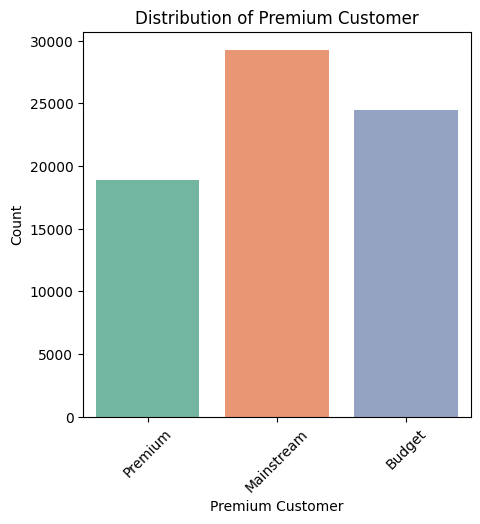

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\3195916093.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='LIFESTAGE', palette='viridis', order=customer_data['LIFESTAGE'].value_counts().index)


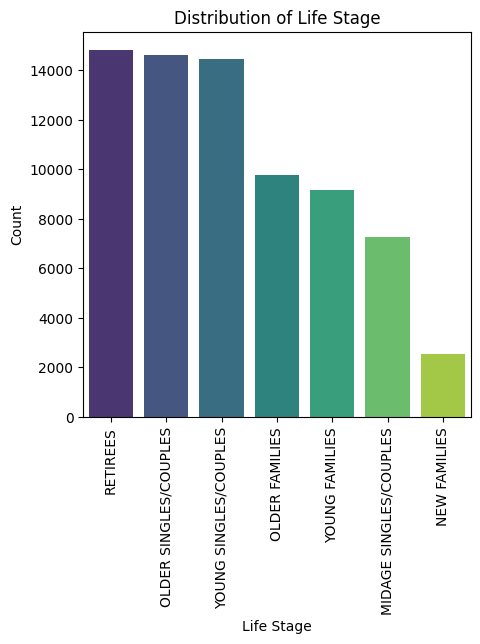

In [47]:
import seaborn as sns

# Data distribution of PREMIUM_CUSTOMER
plt.figure(figsize=(5, 5))
sns.countplot(data=customer_data, x='PREMIUM_CUSTOMER', palette='Set2')
plt.xlabel('Premium Customer')
plt.ylabel('Count')
plt.title('Distribution of Premium Customer')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Data distribution of LIFESTAGE
plt.figure(figsize=(5, 5))
sns.countplot(data=customer_data, x='LIFESTAGE', palette='viridis', order=customer_data['LIFESTAGE'].value_counts().index)
plt.xlabel('Life Stage')
plt.ylabel('Count')
plt.title('Distribution of Life Stage')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


In [48]:
# Calculate frequency counts for the 'LIFESTAGE' column
lifestage_counts = customer_data['LIFESTAGE'].value_counts()

# Calculate frequency counts for the 'PREMIUM_CUSTOMER' column
premium_customer_counts = customer_data['PREMIUM_CUSTOMER'].value_counts()

# To calculate proportions, you can use normalize=True
lifestage_proportions = customer_data['LIFESTAGE'].value_counts(normalize=True)
premium_customer_proportions = customer_data['PREMIUM_CUSTOMER'].value_counts(normalize=True)

# Print the results
print("Frequency counts for LIFESTAGE:")
print(lifestage_counts)
print("\nFrequency counts for PREMIUM_CUSTOMER:")
print(premium_customer_counts)

# To print proportions, uncomment the following lines
print("\nProportions for LIFESTAGE:")
print(lifestage_proportions)
print("\nProportions for PREMIUM_CUSTOMER:")
print(premium_customer_proportions)


Frequency counts for LIFESTAGE:
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

Frequency counts for PREMIUM_CUSTOMER:
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

Proportions for LIFESTAGE:
LIFESTAGE
RETIREES                  0.203822
OLDER SINGLES/COUPLES     0.201123
YOUNG SINGLES/COUPLES     0.198811
OLDER FAMILIES            0.134642
YOUNG FAMILIES            0.126354
MIDAGE SINGLES/COUPLES    0.100156
NEW FAMILIES              0.035092
Name: proportion, dtype: float64

Proportions for PREMIUM_CUSTOMER:
PREMIUM_CUSTOMER
Mainstream    0.402619
Budget        0.336881
Premium       0.260501
Name: proportion, dtype: float64


In [49]:
data = pd.merge(dataset, customer_data, how='left', on='LYLTY_CARD_NBR')

In [50]:
data

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
246735 2019-03-09        272          272319  270088        89   
246736 2018-08-13        272          272358  270154        74   
246737 2018-11-06        272          272379  270187        51   
246738 2018-12-27        272          272379  270188        42   
246739 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
...                                          ...       ...        ...   
246735   Kettle Sweet Chilli And Sour Cream 175g         2       10.8   
246736             Tostitos Splash Of  Lime 175g         1        4.4   
246737                  Doritos Mexicana    170g         2        8.8   
246738   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8   
246739             Tostitos Splash Of  Lime 175g         2        8.8   

        PACK_SIZE     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0           175.0   Natural   YOUNG SINGLES/COUPLES          Premium  
1           175.0       CCs  MIDAGE SINGLES/COUPLES           Budget  
2           170.0    Smiths  MIDAGE SINGLES/COUPLES           Budget  
3           175.0    Smiths  MIDAGE SINGLES/COUPLES           Budget  
4           150.0    Kettle  MIDAGE SINGLES/COUPLES           Budget  
...           ...       ...                     ...              ...  
246735      175.0    Kettle   YOUNG SINGLES/COUPLES          Premium  
246736      175.0  Tostitos   YOUNG SINGLES/COUPLES          Premium  
246737      170.0   Doritos   YOUNG SINGLES/COUPLES          Premium  
246738      150.0   Doritos   YOUNG SINGLES/COUPLES          Premium  
246739      175.0  Tostitos   YOUNG SINGLES/COUPLES          Premium  

[246740 rows x 12 columns]

In [51]:
# Find customers not matched in the merge
unmatched_customers = customer_data[customer_data['LYLTY_CARD_NBR'].isin(data['LYLTY_CARD_NBR']) == False]

# Display the unmatched customers
(unmatched_customers)


LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
21               1028   YOUNG SINGLES/COUPLES           Budget
78               1117   OLDER SINGLES/COUPLES       Mainstream
90               1137  MIDAGE SINGLES/COUPLES          Premium
95               1143          OLDER FAMILIES           Budget
100              1152                RETIREES           Budget
...               ...                     ...              ...
72437          272164          YOUNG FAMILIES       Mainstream
72515          272276          YOUNG FAMILIES           Budget
72530          272295                RETIREES       Mainstream
72547          272321   OLDER SINGLES/COUPLES          Premium
72608          880551   OLDER SINGLES/COUPLES          Premium

[1350 rows x 3 columns]

In [52]:
# Check for transactions without matched customer details
missing_customer_transactions = data[data['LYLTY_CARD_NBR'].isnull()]

# Display the missing customer transactions
print(missing_customer_transactions)


Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [53]:
file_path = "Desktop"
data.to_csv(file_path, index=False)  # Set 'index' to False to exclude the index column

print(f'Data has been written to {file_path}')

Data has been written to Desktop


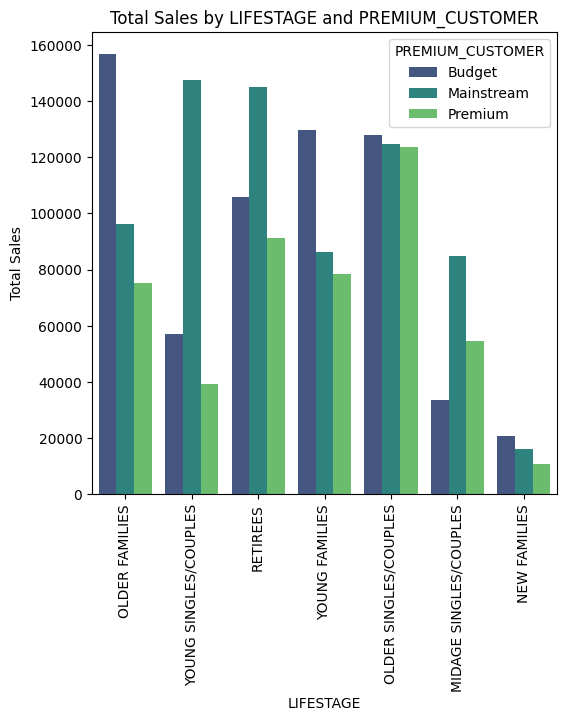

In [54]:


# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sort the DataFrame by total sales (optional)
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)

# Create a bar plot to visualize the contribution of each customer segment
plt.figure(figsize=(6, 6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='PREMIUM_CUSTOMER')

plt.show()


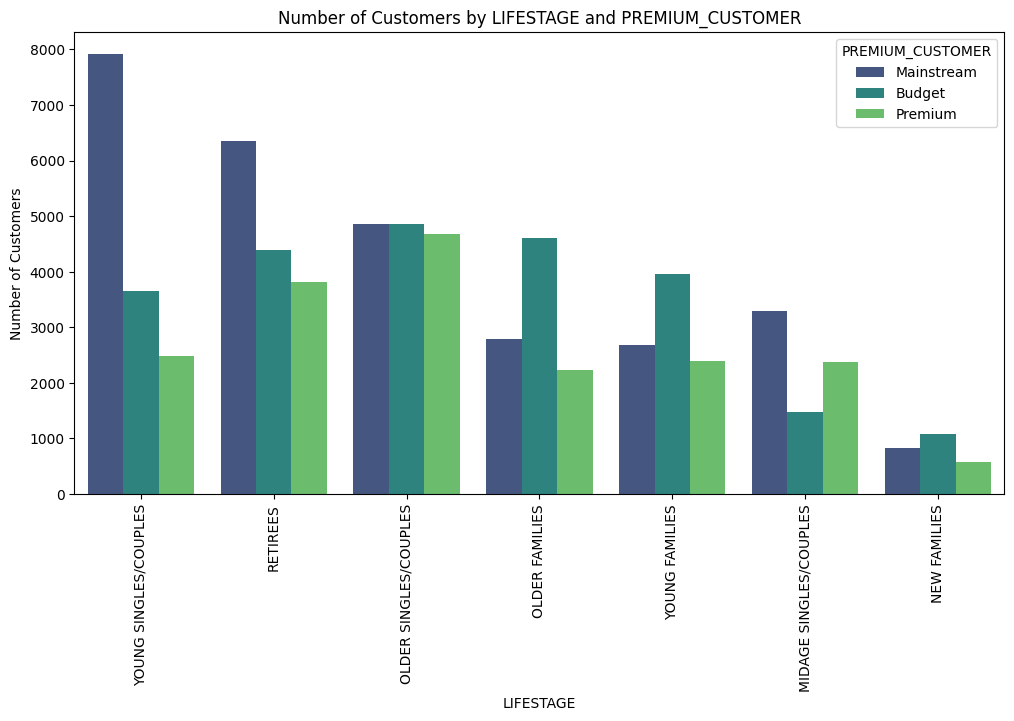

In [55]:

# Calculate the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_counts = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Sort the DataFrame by customer counts (optional)
customer_counts = customer_counts.sort_values(by='LYLTY_CARD_NBR', ascending=False)

# Create a bar plot to visualize the number of customers in each segment
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_counts, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='PREMIUM_CUSTOMER')

plt.show()


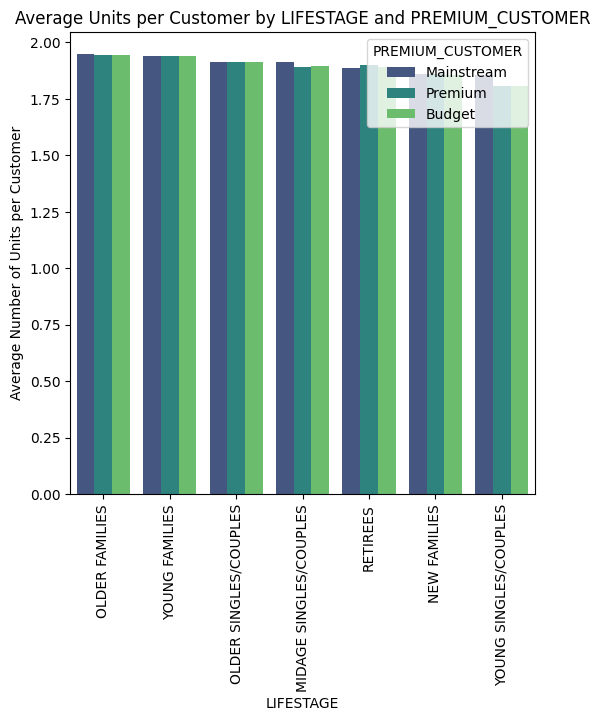

In [56]:

# Calculate the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Sort the DataFrame by average units (optional)
avg_units_per_customer = avg_units_per_customer.sort_values(by='PROD_QTY', ascending=False)

# Create a bar plot to visualize the average number of units per customer in each segment
plt.figure(figsize=(6, 6))
sns.barplot(data=avg_units_per_customer, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Number of Units per Customer')
plt.title('Average Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='PREMIUM_CUSTOMER')

plt.show()


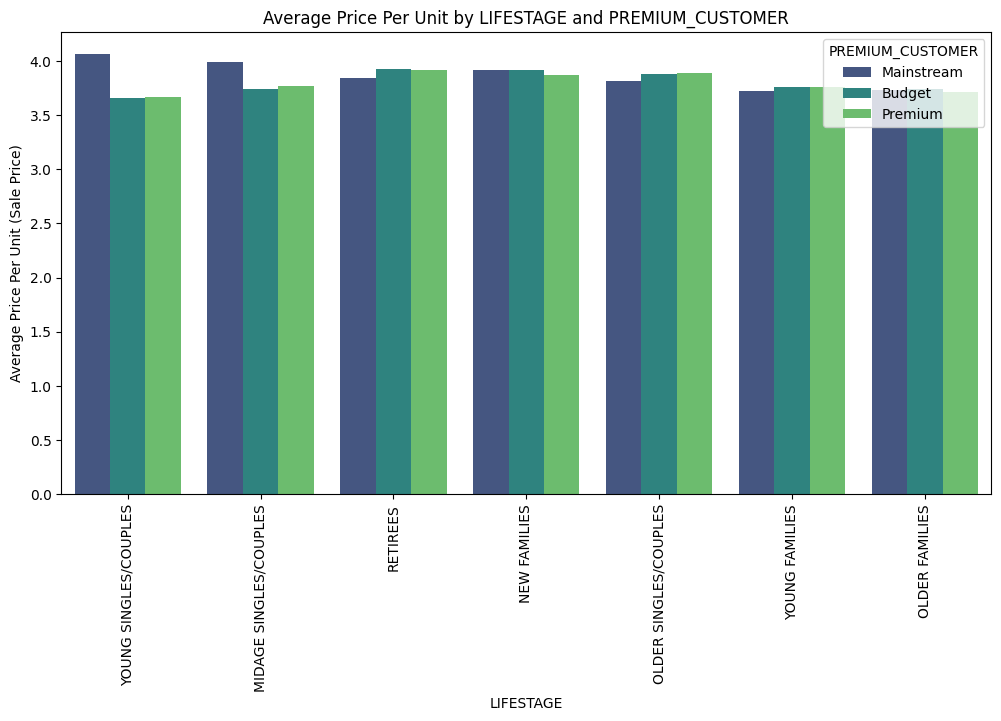

In [57]:
# Calculate the average price per unit (average sale price) by LIFESTAGE and PREMIUM_CUSTOMER
data['AVG_PRICE_PER_UNIT'] = data['TOT_SALES'] / data['PROD_QTY']

# Calculate the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['AVG_PRICE_PER_UNIT'].mean().reset_index()

# Sort the DataFrame by average price per unit (optional)
avg_price_per_unit = avg_price_per_unit.sort_values(by='AVG_PRICE_PER_UNIT', ascending=False)

# Create a bar plot to visualize the average price per unit in each segment
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_per_unit, x='LIFESTAGE', y='AVG_PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price Per Unit (Sale Price)')
plt.title('Average Price Per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='PREMIUM_CUSTOMER')

plt.show()


In [58]:
import pandas as pd
from scipy import stats

# Assuming you have a DataFrame named 'merged_data' with the relevant columns

# Separate the data into the two groups you want to compare
mainstream_group = data[data['PREMIUM_CUSTOMER'].isin(['Mainstream'])]
premium_group = data[data['PREMIUM_CUSTOMER'].isin(['Premium'])]

budget_midage_group = data[data['LIFESTAGE'].isin(['Budget (Midage)'])]
young_singles_couples_group = data[data['LIFESTAGE'].isin(['Young Singles/Couples'])]

# Perform t-tests for the 'TOT_SALES' column
t_stat_mainstream_premium, p_value_mainstream_premium = stats.ttest_ind(mainstream_group['TOT_SALES'], premium_group['TOT_SALES'])
t_stat_budget_midage_young, p_value_budget_midage_young = stats.ttest_ind(budget_midage_group['TOT_SALES'], young_singles_couples_group['TOT_SALES'])

# Print the t-statistic and p-value for each comparison
print(f"Mainstream vs. Premium - t-statistic: {t_stat_mainstream_premium}, p-value: {p_value_mainstream_premium}")
print(f"Budget (Midage) vs. Young Singles/Couples - t-statistic: {t_stat_budget_midage_young}, p-value: {p_value_budget_midage_young}")


Mainstream vs. Premium - t-statistic: 7.274853694658808, p-value: 3.483741722160045e-13
Budget (Midage) vs. Young Singles/Couples - t-statistic: nan, p-value: nan


In [63]:
# Filter the data for the Mainstream - young singles/couples segment
mainstream_singles_couples = data[data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']

# Group the data by 'BRAND' and calculate the total quantity of products purchased for each brand
brand_preferences = mainstream_singles_couples.groupby('BRAND')['PROD_QTY'].sum().reset_index()

# Sort the brand preferences in descending order based on purchase quantity
brand_preferences = brand_preferences.sort_values(by='PROD_QTY', ascending=False)

# Display the top brand preferences
print(brand_preferences)


         BRAND  PROD_QTY
12      Kettle     10993
15    Pringles      6837
18      Smiths      6388
6      Doritos      5926
21       Thins      3650
16         RRD      3544
10   Infuzions      2912
4         Cobs      2591
23    Twisties      2588
22    Tostitos      2534
25          WW      2216
24    Tyrrells      1765
8        Grain      1674
14     Natural      1356
3     Cheezels      1135
1          CCs      1054
5       Dorito       879
11      Infzns       836
2      Cheetos       635
17       Smith       602
7       French       339
26  Woolworths       336
20    Sunbites       324
0       Burger       313
19       Snbts       301
9      GrnWves       290
13         NCC       282


In [89]:
data

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
246735 2019-03-09        272          272319  270088        89   
246736 2018-08-13        272          272358  270154        74   
246737 2018-11-06        272          272379  270187        51   
246738 2018-12-27        272          272379  270188        42   
246739 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
...                                          ...       ...        ...   
246735   Kettle Sweet Chilli And Sour Cream 175g         2       10.8   
246736             Tostitos Splash Of  Lime 175g         1        4.4   
246737                  Doritos Mexicana    170g         2        8.8   
246738   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8   
246739             Tostitos Splash Of  Lime 175g         2        8.8   

        PACK_SIZE     BRAND               LIFESTAGE PREMIUM_CUSTOMER  \
0           175.0   Natural   YOUNG SINGLES/COUPLES          Premium   
1           175.0       CCs  MIDAGE SINGLES/COUPLES           Budget   
2           170.0    Smiths  MIDAGE SINGLES/COUPLES           Budget   
3           175.0    Smiths  MIDAGE SINGLES/COUPLES           Budget   
4           150.0    Kettle  MIDAGE SINGLES/COUPLES           Budget   
...           ...       ...                     ...              ...   
246735      175.0    Kettle   YOUNG SINGLES/COUPLES          Premium   
246736      175.0  Tostitos   YOUNG SINGLES/COUPLES          Premium   
246737      170.0   Doritos   YOUNG SINGLES/COUPLES          Premium   
246738      150.0   Doritos   YOUNG SINGLES/COUPLES          Premium   
246739      175.0  Tostitos   YOUNG SINGLES/COUPLES          Premium   

        AVG_PRICE_PER_UNIT  
0                     3.00  
1                     2.10  
2                     1.45  
3                     3.00  
4                     4.60  
...                    ...  
246735                5.40  
246736                4.40  
246737                4.40  
246738                3.90  
246739                4.40  

[246740 rows x 13 columns]

In [64]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
# Convert the dataset into a one-hot encoded format
basket = data.groupby(['LYLTY_CARD_NBR', 'BRAND'])['PACK_SIZE'].sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')

# Encode the quantity values as binary (0 or 1)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Run the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
# Use association rules to find brand preferences
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
sorted_rules = rules.sort_values(by='lift', ascending=False)


C:\Users\Lenovo\.conda\envs\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [65]:
dataset

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
...                                          ...       ...        ...   
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8   
264832             Tostitos Splash Of  Lime 175g         1        4.4   
264833                  Doritos Mexicana    170g         2        8.8   
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8   
264835             Tostitos Splash Of  Lime 175g         2        8.8   

        PACK_SIZE     BRAND  
0           175.0   Natural  
1           175.0       CCs  
2           170.0    Smiths  
3           175.0    Smiths  
4           150.0    Kettle  
...           ...       ...  
264831      175.0    Kettle  
264832      175.0  Tostitos  
264833      170.0   Doritos  
264834      150.0   Doritos  
264835      175.0  Tostitos  

[246740 rows x 10 columns]

In [66]:
sorted_rules

antecedents        consequents  antecedent support  \
793       (Smiths, WW)      (RRD, Kettle)            0.055438   
796      (RRD, Kettle)       (Smiths, WW)            0.068554   
797       (WW, Kettle)      (Smiths, RRD)            0.051510   
792      (Smiths, RRD)       (WW, Kettle)            0.074558   
636      (Smiths, RRD)          (Natural)            0.074558   
..                 ...                ...                 ...   
4           (Pringles)              (CCs)            0.289772   
126            (Smith)           (Kettle)            0.039741   
127           (Kettle)            (Smith)            0.423303   
347  (Doritos, Kettle)               (WW)            0.121972   
350               (WW)  (Doritos, Kettle)            0.124385   

     consequent support   support  confidence      lift  leverage  conviction  \
793            0.068554  0.010605    0.191296  2.790441  0.006805    1.151776   
796            0.055438  0.010605    0.154696  2.790441  0.006805    1.117423   
797            0.074558  0.010605    0.205882  2.761380  0.006765    1.165372   
792            0.051510  0.010605    0.142239  2.761380  0.006765    1.105774   
636            0.077476  0.014407    0.193227  2.494035  0.008630    1.143474   
..                  ...       ...         ...       ...       ...         ...   
4              0.059562  0.017324    0.059786  1.003760  0.000065    1.000238   
126            0.423303  0.016861    0.424285  1.002320  0.000039    1.001706   
127            0.039741  0.016861    0.039833  1.002320  0.000039    1.000096   
347            0.124385  0.015206    0.124669  1.002290  0.000035    1.000325   
350            0.121972  0.015206    0.122251  1.002290  0.000035    1.000318   

     zhangs_metric  
793       0.679292  
796       0.688858  
797       0.672503  
792       0.689251  
636       0.647305  
..             ...  
4         0.005275  
126       0.002411  
127       0.004014  
347       0.002602  
350       0.002609  

[802 rows x 10 columns]

In [67]:
rules

antecedents            consequents  antecedent support  \
0       (Doritos)                  (CCs)            0.259809   
1           (CCs)              (Doritos)            0.059562   
2       (Natural)                  (CCs)            0.077476   
3           (CCs)              (Natural)            0.059562   
4      (Pringles)                  (CCs)            0.289772   
..            ...                    ...                 ...   
797  (WW, Kettle)          (Smiths, RRD)            0.051510   
798      (Smiths)      (RRD, WW, Kettle)            0.283011   
799         (RRD)   (Smiths, WW, Kettle)            0.167085   
800          (WW)  (Smiths, RRD, Kettle)            0.124385   
801      (Kettle)      (Smiths, RRD, WW)            0.423303   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.059562  0.015669    0.060310  1.012556  0.000194    1.000796   
1              0.259809  0.015669    0.263071  1.012556  0.000194    1.004427   
2              0.059562  0.010198    0.131631  2.209987  0.005584    1.082994   
3              0.077476  0.010198    0.171220  2.209987  0.005584    1.113111   
4              0.059562  0.017324    0.059786  1.003760  0.000065    1.000238   
..                  ...       ...         ...       ...       ...         ...   
797            0.074558  0.010605    0.205882  2.761380  0.006765    1.165372   
798            0.020158  0.010605    0.037472  1.858925  0.004900    1.017988   
799            0.026316  0.010605    0.063471  2.411854  0.006208    1.039673   
800            0.035126  0.010605    0.085260  2.427287  0.006236    1.054807   
801            0.022164  0.010605    0.025053  1.130351  0.001223    1.002963   

     zhangs_metric  
0         0.016753  
1         0.013186  
2         0.593490  
3         0.582185  
4         0.005275  
..             ...  
797       0.672503  
798       0.644437  
799       0.702810  
800       0.671547  
801       0.199965  

[802 rows x 10 columns]